In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
import seaborn as sb

In [2]:
df_covid = pd.read_csv('dataset-covid19.csv', encoding = "ISO-8859-1")
df_covid = df_covid[['state', 'city', 'place_type', 'city_ibge_code', 'last_available_confirmed', 'last_available_deaths', 'last_available_death_rate', 'estimated_population', 'last_available_confirmed_per_100k_inhabitants']]

In [3]:
df_covid = df_covid.loc[df_covid['place_type'] == 'city', :]

In [4]:
df_covid = df_covid.loc[df_covid['city_ibge_code'].notna(), :]

In [5]:
df_covid['city_ibge_code'] = df_covid['city_ibge_code'].apply(lambda x: int(x))

In [6]:
df_covid

,state,city,place_type,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants
14,PI,AcauÃ£,city,2200053,45,0,0.0000,7102.0,633.62433
15,PI,AgricolÃ¢ndia,city,2200103,64,0,0.0000,5131.0,1247.32021
16,PI,Ãgua Branca,city,2200202,1018,44,0.0432,17470.0,5827.13223
17,PI,Alagoinha do PiauÃ­,city,2200251,116,3,0.0259,7665.0,1513.37247
18,PI,Alegrete do PiauÃ­,city,2200277,317,1,0.0032,4918.0,6445.70964
...,...,...,...,...,...,...,...,...,...
5608,MT,Vale de SÃ£o Domingos,city,5108352,19,1,0.0526,3126.0,607.80550
5609,MT,VÃ¡rzea Grande,city,5108402,5234,337,0.0644,287526.0,1820.35712
5610,MT,Vera,city,5108501,160,4,0.0250,11402.0,1403.26259
5611,MT,Vila Bela da SantÃ­ssima Trindade,city,5105507,390,13,0.0333,16271.0,2396.90246


In [7]:
df_sus = pd.read_csv('IDSUS_2011.csv')

In [8]:
df_sus

,mundesc,codmun,uf,cobatb,cobsbuc,prprenat7,prprenat4-6,prprenat1-3,rzcito,rzmamogr,...,prcuratb,prcurahans,Cobtetrav1,mescovds,prexodon,prparton,probm15uti,probiiam,ghm,RegBr
0,Alta Floresta D'Oeste,110001,RO,"66,8%","17,2%","49,7%","45,5%","3,1%","106,8%","4,8%",...,"100,0%","92,9%","113,4%","0,08","10,2%","32,9%","13,7%","13,8%",GH3,N
1,Ariquemes,110002,RO,"43,8%","16,4%","53,6%","37,1%","6,8%","72,7%","17,6%",...,"80,0%","91,3%","97,5%","0,02","8,6%","25,9%","14,2%","21,0%",GH3,N
2,Cabixi,110003,RO,"95,1%","47,6%","44,9%","49,0%","4,4%","48,7%","3,0%",...,"100,0%","57,1%","89,1%","0,35","10,2%","14,4%","15,2%","17,1%",GH5,N
3,Cacoal,110004,RO,"36,5%","30,2%","59,9%","33,4%","5,9%","61,4%","4,7%",...,"90,9%","91,8%","96,7%","0,05","8,2%","30,4%","17,6%","21,1%",GH3,N
4,Cerejeiras,110005,RO,"70,5%","30,3%","59,0%","34,3%","2,9%","39,0%","3,4%",...,"60,0%","100,0%","116,6%","0,00","12,6%","24,0%","17,8%","18,4%",GH5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,Vianópolis,522200,GO,"120,9%","58,4%","54,5%","37,2%","4,8%","63,8%","5,0%",...,"100,0%","60,0%","91,7%","0,00","0,0%","45,0%","15,6%","14,5%",GH5,CO
5561,Vicentinópolis,522205,GO,"81,4%","40,7%","88,3%","9,7%","0,6%","117,4%","3,0%",...,"0,0%","57,1%","104,8%","0,00","31,9%","29,7%","13,9%","12,9%",GH5,CO
5562,Vila Boa,522220,GO,"126,5%","126,5%","33,3%","51,9%","13,3%","67,7%","0,0%",...,"100,0%","88,9%","104,9%","7,47","6,4%","56,9%","14,2%","16,0%",GH5,CO
5563,Vila Propício,522230,GO,"118,9%","116,6%","58,1%","29,3%","12,0%","24,3%","0,2%",...,"100,0%","77,3%","158,3%","0,00","13,3%","43,2%","13,0%","13,2%",GH5,CO


In [9]:
def to_decimal(x):
    return float(x.replace('%', '').replace(',', '.')) / 100

Converte a coluna cobatb para decimal. Vou converter apenas essa pois é a única que nos interessa. 

In [10]:
df_sus['cobatb'] = df_sus['cobatb'].apply(lambda x: to_decimal(x))

In [11]:
df_sus = df_sus[['codmun', 'cobatb']]

In [12]:
df_sus

,codmun,cobatb
0,110001,0.668
1,110002,0.438
2,110003,0.951
3,110004,0.365
4,110005,0.705
...,...,...
5560,522200,1.209
5561,522205,0.814
5562,522220,1.265
5563,522230,1.189


In [13]:
df_ibge_code = pd.read_csv('dataset-codigos-ibge.csv')

In [14]:
df_ibge_code

,id_municipio,id_municipio_6
0,1100015,110001
1,1100023,110002
2,1100031,110003
3,1100049,110004
4,1100056,110005
...,...,...
5565,5222005,522200
5566,5222054,522205
5567,5222203,522220
5568,5222302,522230


In [15]:
df_sus = df_sus.merge(df_ibge_code, how='inner', left_on='codmun', right_on='id_municipio_6').drop(['id_municipio_6'], axis = 1)

In [16]:
df_covid.columns

Index(['state', 'city', 'place_type', 'city_ibge_code',
       'last_available_confirmed', 'last_available_deaths',
       'last_available_death_rate', 'estimated_population',
       'last_available_confirmed_per_100k_inhabitants'],
      dtype='object')

In [17]:
df_covid = df_covid.merge(df_sus, how='inner', right_on='id_municipio', left_on='city_ibge_code')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7e02e3850>,
      dtype=object)

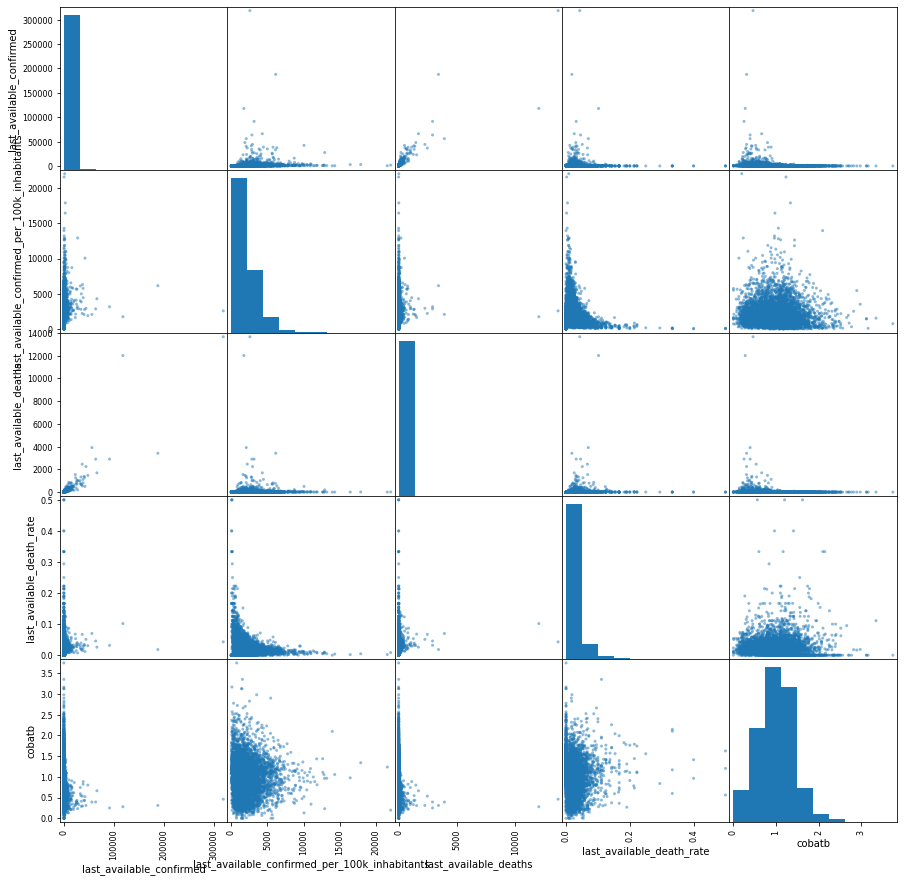

In [18]:
df_matrix = df_covid[['last_available_confirmed','last_available_confirmed_per_100k_inhabitants', 
                      'last_available_deaths', 'last_available_death_rate', 'cobatb']]

pd.plotting.scatter_matrix(df_matrix, figsize  = [15, 15])

In [19]:
df_matrix.corr()

,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_deaths,last_available_death_rate,cobatb
last_available_confirmed,1.000000,0.126424,0.887466,0.019650,-0.150499
last_available_confirmed_per_100k_inhabitants,0.126424,1.000000,0.046064,-0.211628,-0.079779
last_available_deaths,0.887466,0.046064,1.000000,0.058164,-0.113187
last_available_death_rate,0.019650,-0.211628,0.058164,1.000000,-0.015869
cobatb,-0.150499,-0.079779,-0.113187,-0.015869,1.000000


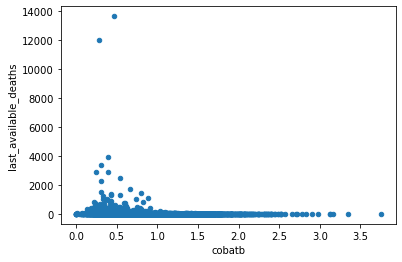

In [20]:
df_covid.plot.scatter(x = 'cobatb', y = 'last_available_deaths' )

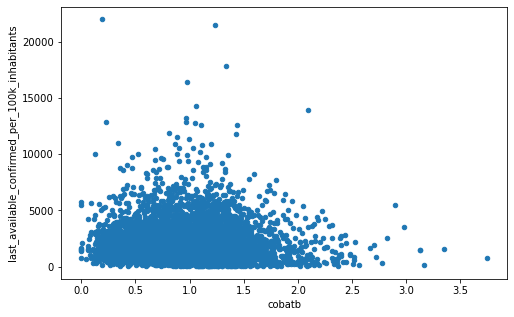

In [40]:
df_covid.plot.scatter(x = 'cobatb', y = 'last_available_confirmed_per_100k_inhabitants', figsize=[8, 5])

In [38]:
pd.DataFrame.plot(data=df_covid, x = 'cobatb', y = 'last_available_confirmed_per_100k_inhabitants', figsize=[10, 5], ylabel='Casos por 100k habitantes', xlabel='Cobertura SUS')

TypeError: __init__() got an unexpected keyword argument 'x'

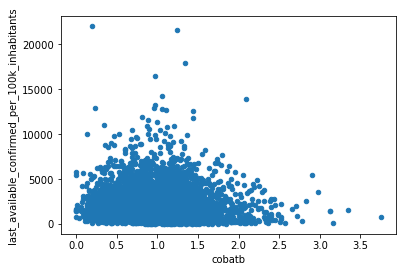

In [22]:
df_covid.plot.scatter(x = 'cobatb', y = 'last_available_confirmed_per_100k_inhabitants' )

In [23]:
df_covid.describe()

,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants,codmun,cobatb,id_municipio
count,5.562000e+03,5562.000000,5562.000000,5562.000000,5.562000e+03,5561.000000,5562.000000,5562.000000,5.562000e+03
mean,3.253113e+06,967.136641,28.304567,0.025552,3.806119e+04,2080.499512,325310.807983,1.008862,3.253113e+06
std,9.847836e+05,6140.486759,275.258721,0.029822,2.230502e+05,1724.158026,98478.359717,0.419874,9.847836e+05
min,1.100015e+06,0.000000,0.000000,0.000000,7.760000e+02,10.851870,110001.000000,0.000000,1.100015e+06
25%,2.512083e+06,64.000000,1.000000,0.009600,5.443250e+03,909.977250,251207.750000,0.724250,2.512083e+06
50%,3.146156e+06,184.000000,4.000000,0.020000,1.166950e+04,1666.968650,314615.000000,1.020000,3.146156e+06
75%,4.119078e+06,558.000000,12.000000,0.032600,2.568000e+04,2741.020790,411907.500000,1.264000,4.119078e+06
max,5.300108e+06,318533.000000,13660.000000,0.500000,1.232523e+07,22015.810280,530010.000000,3.747000,5.300108e+06


In [24]:
df_demo = pd.read_excel('IDH_2010.xls')

In [25]:
df_covid.columns

Index(['state', 'city', 'place_type', 'city_ibge_code',
       'last_available_confirmed', 'last_available_deaths',
       'last_available_death_rate', 'estimated_population',
       'last_available_confirmed_per_100k_inhabitants', 'codmun', 'cobatb',
       'id_municipio'],
      dtype='object')

In [26]:
df_demo = df_demo[['Código do Município', '% de extremamente pobres', 'Índice de Gini', 
                   'Renda per capita', '% da população em domicílios com densidade > 2', 
                   'IDHM', 'IDHM Renda']]

In [27]:
df_demo

,Código do Município,% de extremamente pobres,Índice de Gini,Renda per capita,% da população em domicílios com densidade > 2,IDHM,IDHM Renda
0,110001,14.29,0.58,476.99,22.58,0.641,0.657
1,110002,4.36,0.53,689.95,27.15,0.702,0.716
2,110003,7.27,0.51,457.17,19.93,0.650,0.650
3,110004,5.97,0.57,738.06,20.50,0.718,0.727
4,110005,4.72,0.50,577.18,16.66,0.692,0.688
...,...,...,...,...,...,...,...
5559,522200,0.70,0.46,664.33,12.55,0.712,0.710
5560,522205,2.62,0.46,651.07,16.12,0.684,0.707
5561,522220,9.16,0.48,376.72,34.54,0.647,0.619
5562,522230,9.72,0.47,401.84,29.16,0.634,0.629


In [28]:
df_covid = df_covid.merge(df_demo, how='inner', left_on='codmun', right_on='Código do Município')

In [29]:
df_covid

,state,city,place_type,city_ibge_code,last_available_confirmed,last_available_deaths,last_available_death_rate,estimated_population,last_available_confirmed_per_100k_inhabitants,codmun,cobatb,id_municipio,Código do Município,% de extremamente pobres,Índice de Gini,Renda per capita,% da população em domicílios com densidade > 2,IDHM,IDHM Renda
0,PI,AcauÃ£,city,2200053,45,0,0.0000,7102.0,633.62433,220005,1.334,2200053,220005,32.12,0.50,199.35,36.52,0.528,0.517
1,PI,AgricolÃ¢ndia,city,2200103,64,0,0.0000,5131.0,1247.32021,220010,1.173,2200103,220010,24.00,0.49,245.68,24.62,0.599,0.550
2,PI,Ãgua Branca,city,2200202,1018,44,0.0432,17470.0,5827.13223,220020,1.411,2200202,220020,14.39,0.49,335.63,26.90,0.639,0.600
3,PI,Alagoinha do PiauÃ­,city,2200251,116,3,0.0259,7665.0,1513.37247,220025,1.233,2200251,220025,28.91,0.51,222.87,24.04,0.531,0.535
4,PI,Alegrete do PiauÃ­,city,2200277,317,1,0.0032,4918.0,6445.70964,220027,1.165,2200277,220027,22.97,0.50,268.12,34.60,0.585,0.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5557,MT,Vale de SÃ£o Domingos,city,5108352,19,1,0.0526,3126.0,607.80550,510835,0.981,5108352,510835,4.75,0.43,479.66,19.06,0.656,0.658
5558,MT,VÃ¡rzea Grande,city,5108402,5234,337,0.0644,287526.0,1820.35712,510840,0.211,5108402,510840,2.01,0.46,668.86,31.60,0.734,0.711
5559,MT,Vera,city,5108501,160,4,0.0250,11402.0,1403.26259,510850,0.609,5108501,510850,3.95,0.42,494.23,24.79,0.680,0.663
5560,MT,Vila Bela da SantÃ­ssima Trindade,city,5105507,390,13,0.0333,16271.0,2396.90246,510550,0.818,5105507,510550,15.10,0.59,439.15,38.24,0.645,0.644


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7d76b0c70>,
      dtype=object)

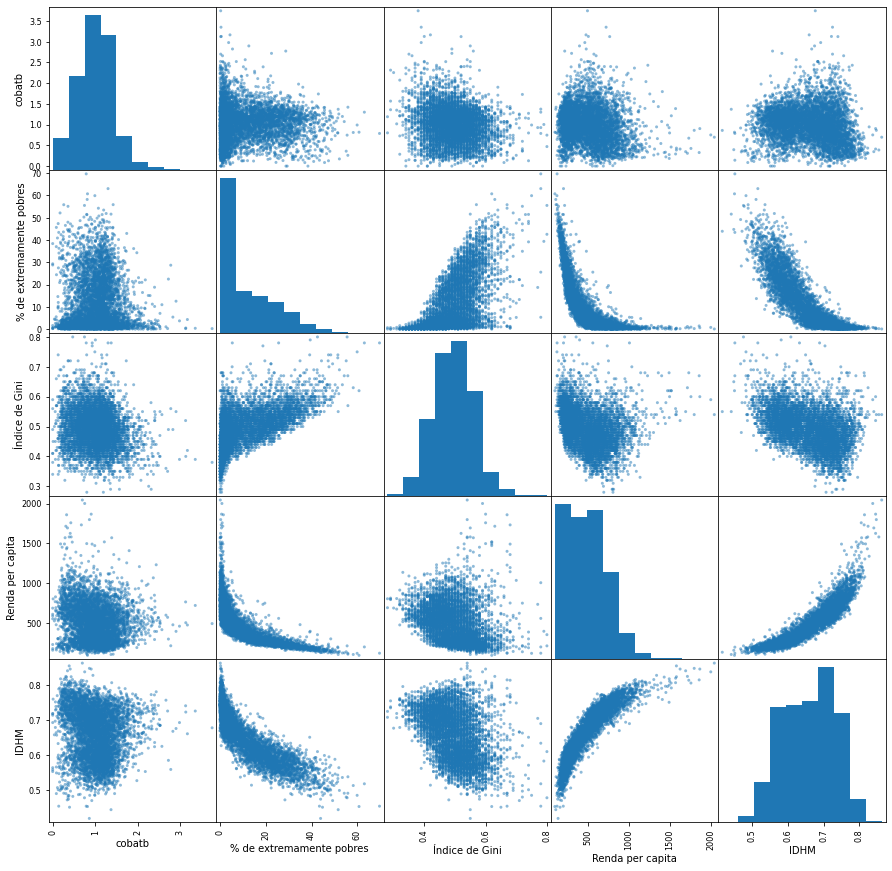

In [30]:
df_demo_matrix = df_covid[['cobatb', '% de extremamente pobres', 'Índice de Gini', 'Renda per capita', 'IDHM']]

pd.plotting.scatter_matrix(df_demo_matrix, figsize  = [15, 15])

In [31]:
df_demo_matrix.corr()

,cobatb,% de extremamente pobres,Índice de Gini,Renda per capita,IDHM
cobatb,1.000000,0.038025,-0.167125,-0.187786,-0.134294
% de extremamente pobres,0.038025,1.000000,0.611896,-0.770026,-0.862926
Índice de Gini,-0.167125,0.611896,1.000000,-0.274167,-0.424186
Renda per capita,-0.187786,-0.770026,-0.274167,1.000000,0.908048
IDHM,-0.134294,-0.862926,-0.424186,0.908048,1.000000
